# Email - Spam or Ham with Python Flask API | Data Science

__Description : Prediction and validation of an email whether it is spam or not based on its formation and use of words by training different machine learning algorithms and estimation of best one with best parameters.__

__Python libraries used :__
    1. Pandas
    2. Scikit-learn
    3. Seaborn
    4. Matplotlib

Import pandas and create a DataFrame _df_ to read Spam and Ham Email dataset. This dataset is downloaded from Kaggle.

In [15]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(20)

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

## Data Analysis and Cleaning

DataFrame consists of information which do not contribute in the estimation of spam emails at all. Model training needs only two columns - Category and Message. Rest of the columns are useless and need to be dropped.

In [17]:
df.isnull().sum()

Category         0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Creating DataFrame df2 after filtering unwanted information.

In [18]:
df2 = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 'columns')
df2.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Couple of things to be taken care of :

1. Dealing with NULL values
2. Create dummy values for locations
3. Dealing with Messages using CountVectorizer
4. Dealing with Unformatted entries

### 1. Dealing with NULL values

Check how many values are NULL in each column.

In [36]:
df2.isna().sum()

Category    0
Message     0
dtype: int64

Dataset does not have any other NULL entries.

### 2. Create dummy values for Category

Here Category 1 is Spam and 0 is Ham. Machine Learning Models work only with numbers. Converting values in __Category__ column to digits by creating dummy values for them.

In [34]:
df3 = df2.replace(['ham', 'spam'], [0, 1])
df3.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df3.shape

(5572, 2)

Examine the statistics of column Category

In [43]:
df3.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
0           4825   4516                             Sorry, I'll call later   
1            747    653  Please call our customer service representativ...   

               
         freq  
Category       
0          30  
1           4

Count the number of message which is a spam (has value 1) and ham (has value 0).

In [46]:
df3['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

## 3. Dealing with Messages using CountVectorizer

Spliting the feature (Message) and labels (Category - spam or ham) into 80% training and 20% test data

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df3.Message, df3.Category, test_size = 0.2)

CounVectorizer converts a collection of text documents to a matrix of token counts and stores a set of unique words.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
print(x_train[:5])
print(x_train_count)


5344               When you guys planning on coming over?
1365    HOT LIVE FANTASIES call now 08707509020 Just 2...
4023                               Wat time Ì_ wan today?
1624    500 free text msgs. Just text ok to 80488 and ...
483     Thank you baby! I cant wait to taste the real ...
Name: Message, dtype: object
  (0, 7409)	1
  (0, 7632)	1
  (0, 3281)	1
  (0, 5196)	1
  (0, 4900)	1
  (0, 1927)	1
  (0, 4989)	1
  (1, 3502)	1
  (1, 4132)	1
  (1, 2788)	1
  (1, 1618)	1
  (1, 4813)	1
  (1, 115)	1
  (1, 3859)	1
  (1, 379)	1
  (1, 5106)	1
  (1, 4454)	1
  (1, 4820)	1
  (1, 4229)	1
  (1, 5226)	1
  (1, 1473)	1
  (1, 319)	1
  (1, 2099)	1
  (1, 2067)	1
  (1, 584)	1
  :	:
  (4454, 947)	1
  (4454, 1102)	1
  (4454, 5841)	1
  (4454, 893)	1
  (4454, 2408)	1
  (4454, 2532)	1
  (4455, 2987)	1
  (4455, 6872)	1
  (4455, 1654)	1
  (4455, 2196)	1
  (4455, 7419)	1
  (4455, 4910)	1
  (4455, 1588)	1
  (4455, 7519)	1
  (4455, 4056)	1
  (4455, 3023)	1
  (4455, 4541)	1
  (4455, 6822)	1
  (4455, 4074)	1
  (4455,

In [82]:

#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report

### 4. Dealing with Unformatted entries

Column 'Message' has entries which is not in proper format - different signs, exclamation marks, special keywords like '$', '%', '_' etc. Training model needs only words. Removing unwanted charachters and filtering Message in proper format.

In [52]:
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19294\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Define a function to remove unwanted characters.

In [110]:
# Function to remove unwanted characters
def preprocessing(df2, l):
    corpus = []
    
    for i in range(0, l):

        # Applying Regular Expression
    
        '''
        Replace email addresses with 'emailaddr'
        Replace URLs with 'httpaddr'
        Replace money symbols with 'moneysymb'
        Replace phone numbers with 'phonenumbr'
        Replace numbers with 'numbr'
        '''
        msg = df2['Message'][i]
        msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df2['Message'][i])
        msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df2['Message'][i])
        msg = re.sub('£|\$', 'moneysymb', df2['Message'][i])
        msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', df2['Message'][i])
        msg = re.sub('\d+(\.\d+)?', 'numbr', df2['Message'][i])
    
        ''' Remove all punctuations '''
        msg = re.sub('[^\w\d\s]', ' ', df2['Message'][i])
        if i<2:
            Message_heading = ("\t\t\t\t MESSAGE ", i)
            #print(Message_heading)
    
        if i<2:
            a = ("\n After Regular Expression - Message ", i, " : ", msg)
            #print(a)
    
        # Each word to lower case
        msg = msg.lower()    
        if i<2:
            b = ("\n Lower case Message ", i, " : ", msg)
            #print(b)
    
        # Splitting words to Tokenize
        msg = msg.split()    
        if i<2:
            c = ("\n After Splitting - Message ", i, " : ", msg)
            #print(c)
    
        # Stemming with PorterStemmer handling Stop Words
        msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
        if i<2:
            d = ("\n After Stemming - Message ", i, " : ", msg)
            #print(d)
    
        # preparing Messages with Remaining Tokens
        msg = ' '.join(msg)
        if i<2:
            e = ("\n Final Prepared - Message ", i, " : ", msg, "\n\n")
            #print(e)
    
        # Preparing WordVector Corpus
        corpus.append(msg)
    return corpus

In [55]:
l = len(df3.Category)
corpus = preprocessing(df3, l)
len(corpus)
corpus[:5]

				 MESSAGE  0

 After Regular Expression - Message  0  :  Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 Lower case Message  0  :  go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After Splitting - Message  0  :  ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After Stemming - Message  0  :  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message  0  :  go jurong point crazi avail bugi n great world la e buffet cine got amor wat 


				 MESSAGE  1

 After Regular Expression - Message  1  :  Ok lar    Joking wif u oni   

 Lower case Message  1  :  ok lar    joking wif u oni   

 After Splitting - Message  1  :  ['ok', 'lar', 'joking', 'wif', '

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [56]:
len(corpus[0])

76

It seems that column Message have proper entries.

Fitting and transforming CountVectorizer with corpus 

In [58]:
cv = CountVectorizer()
x = cv.fit_transform(corpus[:3200]).toarray()


In [59]:
cv.get_feature_names()

['00',
 '000',
 '000pe',
 '008704050406',
 '0089',
 '01',
 '010',
 '0100',
 '01000',
 '012',
 '01223585334',
 '01250',
 '0125698789',
 '01450',
 '0150',
 '01500',
 '01million',
 '02',
 '0200',
 '02000',
 '0207',
 '02072069400',
 '021',
 '0250',
 '0250k',
 '03',
 '033',
 '0350',
 '04',
 '048',
 '05',
 '050',
 '0500',
 '05000',
 '050703',
 '050award',
 '0578',
 '06',
 '07',
 '07046744435',
 '07123456789',
 '0721072',
 '075',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '07801543489',
 '07808',
 '07815296484',
 '07821230901',
 '07880867867',
 '079',
 '07946746291',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '0844',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505

In [61]:
x.shape

(3200, 5428)

In [ ]:
Data has 3200 features and that is why only 3200 labels needs to be taken

In [62]:

y = df2['Category'][:3200]
print (y.value_counts())

print(y[0])
print(y[1])

le = LabelEncoder()
y = le.fit_transform(y)

print(y[5])

ham     2768
spam     432
Name: Category, dtype: int64
ham
ham
1


In [63]:
y.shape

(3200,)

## Training the Model

Preparing train and test data with X as features and Y as labels.

Spliting the feature (x) and labels (y) into 80% training and 20% test data

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.20, random_state = 0)


In [65]:
# Function to predict score
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [66]:
# Importing Classification models 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier


# Creating all the model's objects

GNB_model = GaussianNB()
MNB_model = MultinomialNB()
lr_model = LinearRegression()
log_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()
lasso_model = Lasso(alpha=1, selection='cyclic' )
DT_model = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
Knn_model = KNeighborsClassifier(n_neighbors=5)                      # KNN Model

model_list = [GNB_model, MNB_model, lr_model, log_model, svm_model, rf_model]
model_name = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Linear Regression', 'Logistic Regression', 'SVM', 'RandomForest Classifier']

In [67]:
GNB_model.fit(xtrain, ytrain)
MNB_model.fit(xtrain, ytrain)
lr_model.fit(xtrain, ytrain)
log_model.fit(xtrain, ytrain)
svm_model.fit(xtrain, ytrain)
rf_model.fit(xtrain, ytrain)
lasso_model.fit(xtrain, ytrain)
DT_model.fit(xtrain, ytrain)
Knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Making Model Prediction and Computing Accuracy


In [68]:
# getting model scores and best model
model_scores = []
for i in range(len(model_list)):
    print('Accuracy with '+ model_name[i] + ' is ' + str(get_score(model_list[i], xtrain, xtest, ytrain, ytest)))
    model_scores.append(get_score(model_list[i], xtrain, xtest, ytrain, ytest))
    
print('\n\nMaximum accuracy is ' + str(max(model_scores)) + ' with model : ' + model_name[model_scores.index(max(model_scores))])

Accuracy with Gaussian Naive Bayes is 0.9078125
Accuracy with Multinomial Naive Bayes is 0.9796875
Accuracy with Linear Regression is 0.7167687602944947
Accuracy with Logistic Regression is 0.975
Accuracy with SVM is 0.9765625
Accuracy with RandomForest Classifier is 0.9734375


Maximum accuracy is 0.9796875 with model : Multinomial Naive Bayes


In [69]:
algorithm = [GNB_model, MNB_model, lr_model, log_model, svm_model, rf_model, lasso_model, DT_model, Knn_model]
model_name = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Linear Regression', 'Logistic Regression', 'SVM Model', 'Random Forest Clssifier',
              'Lasso Model', 'Decision Tree', 'K Nearest Neighbors']

scores = []
for i in range(len(model_name)):
    y_pred = algorithm[i].predict(xtest)
    y_scores = algorithm[i].score(xtest, ytest)
    scores.append({
            'Model' : model_name[i],
            'Accuracy'  : y_scores
        })


score_df = pd.DataFrame(scores, columns = ['Model', 'Accuracy'])
score_df


,Model,Accuracy
0,Gaussian Naive Bayes,0.907813
1,Multinomial Naive Bayes,0.979688
2,Linear Regression,0.716769
3,Logistic Regression,0.975000
4,SVM Model,0.976562
5,Random Forest Clssifier,0.971875
6,Lasso Model,-0.000012
7,Decision Tree,0.694041
8,K Nearest Neighbors,0.890625


In [70]:
print('\n\nMaximum accuracy is ' + str(max(model_scores)) + ' with model : ' + model_name[model_scores.index(max(model_scores))])



Maximum accuracy is 0.9796875 with model : Multinomial Naive Bayes


In [72]:
# Making prediction on test data using all the models

y_pred_GNB = GNB_model.predict(xtest)
y_pred_MNB = MNB_model.predict(xtest)
y_pred_lr = lr_model.predict(xtest)
y_pred_log = log_model.predict(xtest)
y_pred_svm = svm_model.predict(xtest)
y_pred_rf = rf_model.predict(xtest)
y_pred_lasso = lasso_model.predict(xtest)
y_pred_dt = DT_model.predict(xtest)
y_pred_knn = Knn_model.predict(xtest)

## Evaluating the Model

__Evaluate models which has Accuracy more than 90 %__

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

### 1. Evaluating Naive Bayes Gaussian Model

In [74]:
# Function to plot confusion matrix
import matplotlib.pyplot as plt
def get_confusion_matrix(y_test, y_pred):
    import seaborn as sn
    plt.figure(figsize = (6,5))
    sn.heatmap(confusion_matrix(y_test,y_pred), cmap="Greens", annot = True)
    plt.xlabel('Predicted Value')
    plt.ylabel('Acual Value')



Classification Report for Naive Bayes Gaussian Model is :

               precision    recall  f1-score   support

           0       0.99      0.90      0.94       553
           1       0.60      0.93      0.73        87

    accuracy                           0.91       640
   macro avg       0.80      0.92      0.84       640
weighted avg       0.94      0.91      0.92       640




Confusion Matrix for Naive Bayes Gaussian Model is :

 None


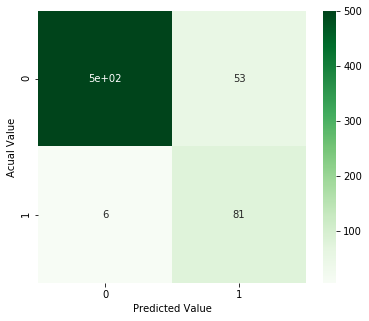

In [75]:
print('\nClassification Report for Naive Bayes Gaussian Model is :\n\n', classification_report(ytest,y_pred_GNB))
print('\n\n\nConfusion Matrix for Naive Bayes Gaussian Model is :\n\n', get_confusion_matrix(ytest,y_pred_GNB))

### 2. Evaluating Naive Bayes Multinomial Model


Classification Report for Naive Bayes Multinomial Model is :

               precision    recall  f1-score   support

           0       0.99      0.98      0.99       553
           1       0.89      0.97      0.93        87

    accuracy                           0.98       640
   macro avg       0.94      0.97      0.96       640
weighted avg       0.98      0.98      0.98       640




Confusion Matrix for Naive Bayes Multinomial Model is :

 None


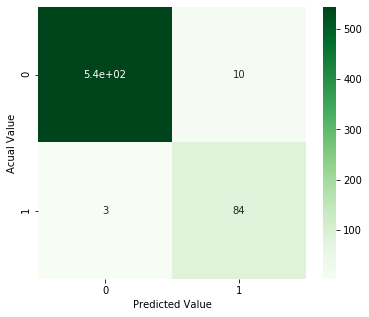

In [77]:
print('\nClassification Report for Naive Bayes Multinomial Model is :\n\n', classification_report(ytest,y_pred_MNB))
print('\n\n\nConfusion Matrix for Naive Bayes Multinomial Model is :\n\n', get_confusion_matrix(ytest,y_pred_MNB))

### 3. Evaluating Logistic Regression Model



Classification Report for Logistic Model is :

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       553
           1       0.97      0.84      0.90        87

    accuracy                           0.97       640
   macro avg       0.97      0.92      0.94       640
weighted avg       0.97      0.97      0.97       640




Confusion Matrix for Logistic Model is :

 None


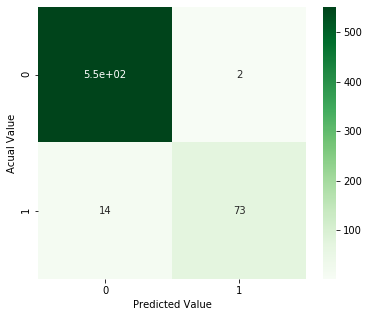

In [79]:
print('\nClassification Report for Logistic Model is :\n\n', classification_report(ytest,y_pred_log))
print('\n\n\nConfusion Matrix for Logistic Model is :\n\n', get_confusion_matrix(ytest,y_pred_log))


### 4. Evaluating SVM Model


Classification Report for SVM Model is :

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       553
           1       0.99      0.84      0.91        87

    accuracy                           0.98       640
   macro avg       0.98      0.92      0.95       640
weighted avg       0.98      0.98      0.98       640




Confusion Matrix for SVM Model is :

 None


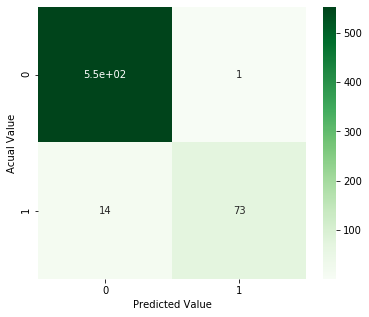

In [80]:
print('\nClassification Report for SVM Model is :\n\n', classification_report(ytest,y_pred_svm))
print('\n\n\nConfusion Matrix for SVM Model is :\n\n', get_confusion_matrix(ytest,y_pred_svm))


### 5. Evaluating Random Forest Model



Classification Report for Random Forest Model is :

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       553
           1       0.99      0.80      0.89        87

    accuracy                           0.97       640
   macro avg       0.98      0.90      0.94       640
weighted avg       0.97      0.97      0.97       640




Confusion Matrix for Random Forest Model is :

 None


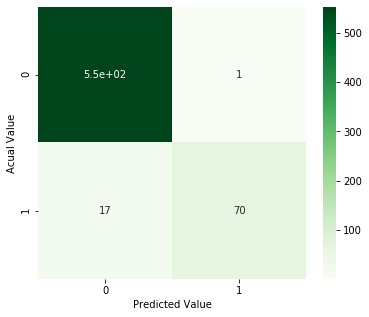

In [82]:
print('\nClassification Report for Random Forest Model is :\n\n', classification_report(ytest,y_pred_rf))
print('\n\n\nConfusion Matrix for Random Forest Model is :\n\n', get_confusion_matrix(ytest,y_pred_rf))


## Predicting Emails with Multinomial Naive Bayes Model


In [90]:

emails = [
    'Hey mohan can we get together to watch footbal game tomorrow',
    'Upto discount on parking exclusive offer just for you. Dont miss this reward'
]

df10 = pd.DataFrame(emails)
df10 = df10.rename(columns={'0': 'Message'})

df10['Message'] = pd.DataFrame(emails)
df10.head()

,0,Message
0,Hey mohan can we get together to watch footbal...,Hey mohan can we get together to watch footbal...
1,Upto discount on parking exclusive offer just ...,Upto discount on parking exclusive offer just ...


In [91]:
l = len(df10.Message)
testing = preprocessing(df10, l)

				 MESSAGE  0

 After Regular Expression - Message  0  :  Hey mohan can we get together to watch footbal game tomorrow

 Lower case Message  0  :  hey mohan can we get together to watch footbal game tomorrow

 After Splitting - Message  0  :  ['hey', 'mohan', 'can', 'we', 'get', 'together', 'to', 'watch', 'footbal', 'game', 'tomorrow']

 After Stemming - Message  0  :  ['hey', 'mohan', 'get', 'togeth', 'watch', 'footbal', 'game', 'tomorrow']

 Final Prepared - Message  0  :  hey mohan get togeth watch footbal game tomorrow 


				 MESSAGE  1

 After Regular Expression - Message  1  :  Upto discount on parking exclusive offer just for you  Dont miss this reward

 Lower case Message  1  :  upto discount on parking exclusive offer just for you  dont miss this reward

 After Splitting - Message  1  :  ['upto', 'discount', 'on', 'parking', 'exclusive', 'offer', 'just', 'for', 'you', 'dont', 'miss', 'this', 'reward']

 After Stemming - Message  1  :  ['upto', 'discount', 'park', 'exclus', 

In [92]:
testing

['hey mohan get togeth watch footbal game tomorrow',
 'upto discount park exclus offer dont miss reward']

In [93]:
test = cv.transform(testing).toarray()

In [94]:
MNB_model.predict(test)

array([0, 1])

Here 0 means NOT SPAM and 1 means SPAM.

Writing a function to predict email.

In [105]:
# Function to predic the Emails on selected model
def predict_spam(model, emails):
    df = pd.DataFrame(emails)
    df = df.rename(columns = {'0' : 'Message'})
    df['Message'] = pd.DataFrame(emails)
    #print(df.head())
    l = len(df10.Message)
    testing = preprocessing(df, l)
    #print(testing)
    test = cv.transform(testing).toarray()
    result_integer = model.predict(test)
    result = []
    for i in result_integer:
        if i == 0:
            result.append('This is NOT a SPAM')
        else:
            result.append('This is a SPAM')
    return result

In [111]:
emails = [
    'Hey mohan can we get together to watch footbal game tomorrow',
    'Upto discount on parking exclusive offer just for you. Dont miss this reward'
]

print(predict_spam(MNB_model, emails))

['This is NOT a SPAM', 'This is a SPAM']


## Result

In [112]:
score_df

,Model,Accuracy
0,Gaussian Naive Bayes,0.907813
1,Multinomial Naive Bayes,0.979688
2,Linear Regression,0.716769
3,Logistic Regression,0.975000
4,SVM Model,0.976562
5,Random Forest Clssifier,0.971875
6,Lasso Model,-0.000012
7,Decision Tree,0.694041
8,K Nearest Neighbors,0.890625


Spam email prediction is performed with different Machine Learning algorithms and found __Multinomial Naive Bayes Model__ has the Maximum accuracy of __97.96%__.

### Saving Model to implement Python Flask API

__I am going to further implement Flask API using HTML, CSS, Javascript, Python Flask API and Postman application in the next Notebook__.

In [113]:
# Extracting all the corpus name of length 5428
corpus_names = cv.get_feature_names()
len(corpus_names)

5428

In [115]:
# Saving Multinomial Naive Bayes Model
import pickle
with open('NBGmodel.pickle', 'wb') as f:
    pickle.dump(MNB_model, f)

In [117]:
# Saving all the extracted corpus_names to use in Flask API
import json
columns = {
    'data_columns' : [col.lower() for col in corpus_names]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))